<a href="https://colab.research.google.com/github/eadamsRU/DataManagment/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard setup


In [181]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify


In [182]:

import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [183]:

#!python --version
gpd.__version__

'1.0.1'

#This gets our NJ county shapefile

In [184]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

This is my shapefile, it did not work when i merged and plotted so I used the code for the NJ shapefile from class

In [185]:
# ! wget -q -O nj-counties.zip https://github.com/eadamsRU/GIS_RU/raw/main/NJ_Counties_3424_-858053776543216328.zip

# zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
# njC0=gpd.read_file('NJ_Counties_3424.shp') #load the shapefile with gpd as njC

In [186]:
njC0.dtypes #with geopandas can do stuff like with pandas :)
#njC0.info()

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,int64


#This gets our datasets


In [ ]:
#! wget -q -O DietExercise.zip https://github.com/eadamsRU/GIS_RU/raw/main/NJ%20county%20Diet%20and%20Exercise.xlsx

#zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
#njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [ ]:
#! wget -q -O FoodIndex.zip https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/NJ%20county%20Food%20Index%20Formatted.xlsx


## Read in dataframes


In [ ]:
#foodIndex = pd.read_excel('https://github.com/eadamsRU/GIS_RU/raw/main/NJ%20county%20Food%20Index%20Formatted.xlsx')


In [ ]:

#foodIndex.dtypes

,0
County,object
Food Environment Index,int64


In [187]:
dietExerciseIndex = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/diet%20exercise%20formatted%203%20-%20Sheet1.csv')

In [188]:
dietExerciseIndex.dtypes

,0
County,object
Healthy Food,float64
Exercise Opportunities,float64
Obese Persons,float64
Physically Inactive Persons,float64
Children Eligible for Free Lunch,float64


In [189]:
dietExerciseIndex.columns = dietExerciseIndex.columns.str.strip()

In [190]:
dietExerciseIndex.dtypes

,0
County,object
Healthy Food,float64
Exercise Opportunities,float64
Obese Persons,float64
Physically Inactive Persons,float64
Children Eligible for Free Lunch,float64


In [191]:
dietExerciseIndex.rename(columns={'County': 'COUNTY'}, inplace=True)

In [192]:
dietExerciseIndex.rename(columns={'Healthy Food': 'HEALTHY FOOD'}, inplace=True)

In [193]:
dietExerciseIndex.rename(columns={'Exercise Opportunities	': 'EXERCISE OPPORTUNITIES'}, inplace=True)

In [194]:
dietExerciseIndex.rename(columns={'Exercise Opportunities	': 'EXERCISE OPPORTUNITIES'}, inplace=True)
dietExerciseIndex.rename(columns={'Obese Persons': 'OBESE PERSONS'}, inplace=True)
dietExerciseIndex.rename(columns={'Physically Inactive Persons': 'PHYSICALLY INACTIVE PERSONS'}, inplace=True)
dietExerciseIndex.rename(columns={'Children Eligible for Free Lunch': 'CHILDREN ELIGIBLE FOR FREE LUNCH'}, inplace=True)

In [195]:
dietExerciseIndex.head(3)

,COUNTY,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH
0,Atlantic County,7.8,93.1,32.4,22.5,53.1
1,Bergen County,0.9,99.5,22.9,18.2,19.0
2,Burlington County,5.0,93.0,30.0,18.4,24.7


In [196]:
# If you want to convert multiple columns
columns_to_convert = ['HEALTHY FOOD', 'Exercise Opportunities', 'OBESE PERSONS', 'PHYSICALLY INACTIVE PERSONS', 'CHILDREN ELIGIBLE FOR FREE LUNCH']  # replace with your actual column names
dietExerciseIndex[columns_to_convert] = dietExerciseIndex[columns_to_convert].astype('int64')


In [197]:
dietExerciseIndex.dtypes

,0
COUNTY,object
HEALTHY FOOD,int64
Exercise Opportunities,int64
OBESE PERSONS,int64
PHYSICALLY INACTIVE PERSONS,int64
CHILDREN ELIGIBLE FOR FREE LUNCH,int64


In [ ]:
#dietExerciseIndex = pd.read_excel('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/Diet%20and%20Exercise%20Formatted%202.xlsx')


In [ ]:
#foodIndex.rename(columns={'County': 'COUNTY'}, inplace=True)


Format and rename columns on COUNTY to match for merge

# MERGE

In [ ]:
#merge
#njC1 = pd.merge(njC0, foodIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)

#njC1[['COUNTY','dec2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

In [ ]:
#njC1.head(1)

In [ ]:
#njC1.dtypes

## I did the merge for the foodindex, however there is just one variable, outside of county variable

In [198]:
njC2 = pd.merge(njC0, dietExerciseIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)


# **Strip the trailing blank spaces**

In [199]:
njC2.columns = njC2.columns.str.strip()


In [200]:
njC2.head(1)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,REGION,Shape_Leng,Shape_Area,geometry,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",NaN,NaN,NaN,NaN,NaN,left_only


For some reason the merge changes my dietExerciseIndex back to Float64, but we will change to Int64, that way it can display the map plot later

In [ ]:
njC2.dtypes

# **Converting to int on njC2**

In [202]:
# Fill NaN values with a default value (e.g., 0)
dietExerciseIndex['HEALTHY FOOD'] = dietExerciseIndex['HEALTHY FOOD'].fillna(0)

# Now convert to int64
dietExerciseIndex['HEALTHY FOOD'] = dietExerciseIndex['HEALTHY FOOD'].astype('int64')

In [203]:
# Fill NaN values with a default value (e.g., 0)
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].fillna(0)

# Now convert to int64
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].astype('int64')

In [ ]:
print(njC2['HEALTHY FOOD'])

# **This step is crucial to get rid of those 0 values so I have something to show**

In [242]:
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].iloc[21:].reset_index(drop=True)


<Axes: >

[]

[]

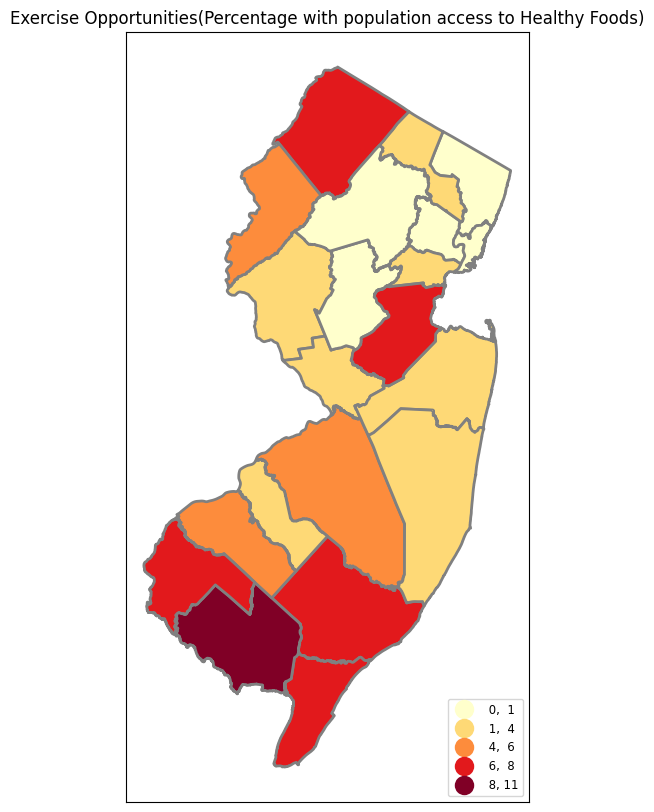

In [243]:

#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='HEALTHY FOOD',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Exercise Opportunities(Percentage with population access to Healthy Foods)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

# Subset plot to ignore those 0 values from the merge

In [ ]:
# First thematic map! Let's unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6, 10))

# Subset njC2 to only include rows from index 21 onward
njC2_subset = njC2.iloc[21:]

In [ ]:
njC2_subset.dtypes

WE need to subset then change to int

In [ ]:
njC2_subset['HEALTHY FOOD'] = njC2_subset['HEALTHY FOOD'].astype('int64')

In [ ]:
njC2_subset['Exercise Opportunities'] = njC2_subset['Exercise Opportunities'].astype('int64')

In [ ]:
njC2_subset['OBESE PERSONS'] = njC2_subset['OBESE PERSONS'].astype('int64')

In [ ]:
njC2_subset['PHYSICALLY INACTIVE PERSONS'] = njC2_subset['PHYSICALLY INACTIVE PERSONS'].astype('int64')

In [ ]:
njC2_subset['CHILDREN ELIGIBLE FOR FREE LUNCH'] = njC2_subset['CHILDREN ELIGIBLE FOR FREE LUNCH'].astype('int64')

In [226]:
print(njC2_subset['HEALTHY FOOD'].dtype)


int64


In [ ]:
# First thematic map! Let's unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6, 10))

# Subset njC2 to only include rows from index 21 onward
njC2_subset = njC2.iloc[21:]

# Plot the subset
njC2_subset.plot(ax=ax, column='HEALTHY FOOD', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
                 edgecolor='grey', linewidth=2,
                 legend_kwds={"fmt": "{:,.0f}",
                               'loc': 'lower right',
                               'title_fontsize': 'medium',
                               'fontsize': 'small',
                               'markerscale': 1.4})

ax.title.set_text("Exercise Opportunities (Percentage with population access to Healthy Foods)")
ax.set_xticks([])  # kills xticks
ax.set_yticks([])  # kills yticks

# plt.savefig('fig.pdf', bbox_inches='tight')  # Save the figure as a PDF
# files.download('fig.pdf')  # Uncomment if you want to download the file

In [ ]:
#njC2 = njC2.iloc[21:]

In [ ]:
njC2.dtypes

Another method

In [ ]:
# Drop rows with NaN values
dietExerciseIndex = dietExerciseIndex.dropna(subset=['HEALTHY FOOD'])

# Then convert to int64
dietExerciseIndex['HEALTHY FOOD'] = dietExerciseIndex['HEALTHY FOOD'].astype('int64')

In [ ]:
njC2.dtypes

# Plot

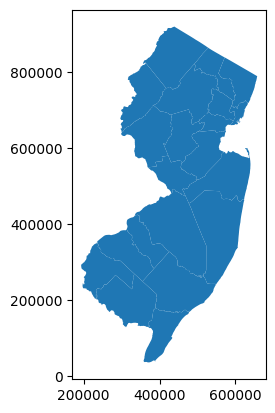

In [ ]:
# Simple plot of the geometries in njC2
ax = njC2.plot()  # No need to specify a column, this will just plot the shapes
plt.show()

In [ ]:
# Option 1: Drop rows with NaN values in 'Obese Persons'
#njC2 = njC2.dropna(subset=['Obese Persons'])

# Option 2: Fill NaN values with a default value (e.g., 0 or the column's mean)
njC2['Obese Persons'] = njC2['Obese Persons'].fillna(0)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


KeyError: 'Obese Persons'

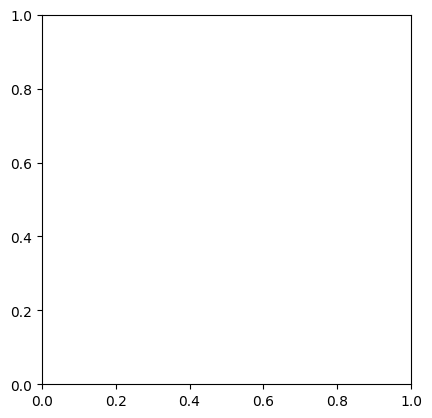

In [ ]:
# Create the plot
ax = njC2.plot(column='Obese Persons', cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=2, legend=True,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
# Set title
ax.set_title("Obese Persons", fontsize=15)

# Remove x and y ticks if you want to clean up the plot further
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

# **Various Checks**

In [ ]:
print(njC2.columns)  # Check if 'geometry' is listed as a column


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'HEALTHY FOOD',
       'Exercise Opportunities', 'OBESE PERSONS',
       'PHYSICALLY INACTIVE PERSONS', 'CHILDREN ELIGIBLE FOR FREE LUNCH',
       '_merge'],
      dtype='object')


In [ ]:
print(njC2.geometry.head())

21    None
22    None
23    None
24    None
25    None
Name: geometry, dtype: geometry


In [ ]:
# Identify invalid geometries
invalid_geometries = njC2[~njC2.is_valid]

# Try fixing the invalid geometries
njC2['geometry'] = njC2['geometry'].buffer(0)

# Recheck the validity of geometries
print(njC2.geometry.is_valid.sum())

0


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
print(njC2.geometry.is_valid.sum())  # This checks how many valid geometries are in your geodataframe
print(njC2.geometry.head())  # Inspect the geometries

0
21    None
22    None
23    None
24    None
25    None
Name: geometry, dtype: geometry


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

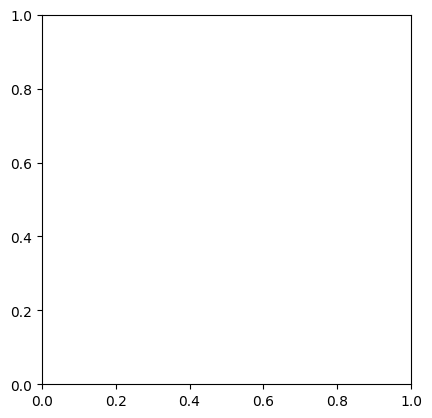

In [ ]:
# Simple plot showing 'Obese Persons' column with default settings
ax = njC2.plot(column='Obese Persons', legend=True)
plt.show()

# Let us edit this below

We can update where we see 'POPDEN2010' to whatever other column you joined on

In [ ]:
#njC2['Obese Persons'] = pd.to_numeric(njC2['Obese Persons'], errors='coerce')  # Ensure numeric values

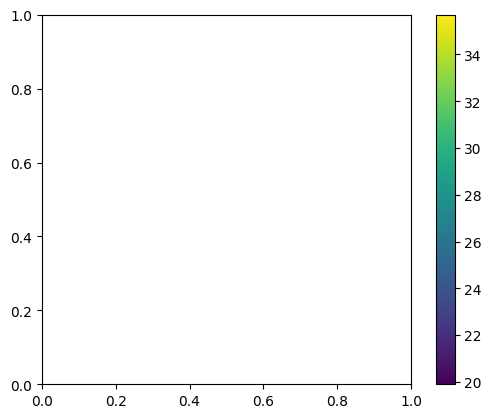

In [ ]:
#ax = njC2.plot(column='Obese Persons', legend=True)
#plt.show()

In [ ]:
#print(njC2.geometry.is_valid)  # Check if geometries are valid
#print(njC2.geometry.is_empty)  # Check if geometries are empty

In [ ]:
#njC2 = njC2[njC2.geometry.is_valid & ~njC2.geometry.is_empty]  # Keep only valid, non-empty geometries


In [ ]:
#print(njC2.crs)  # Check the current CRS


EPSG:3424


In [ ]:
# Example: Set CRS to WGS84 (commonly used for geographic data)
#njC2 = njC2.set_crs('EPSG:4326', allow_override=True)

In [ ]:
#ax = njC2.plot(column='Obese Persons', legend=True)
#plt.show()

In [ ]:
#print(njC2['Obese Persons'].describe())  # Check the data in the column


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Obese Persons, dtype: float64


This should create the map below

Text(0.5, 1.0, 'Obese Persons')

[]

[]

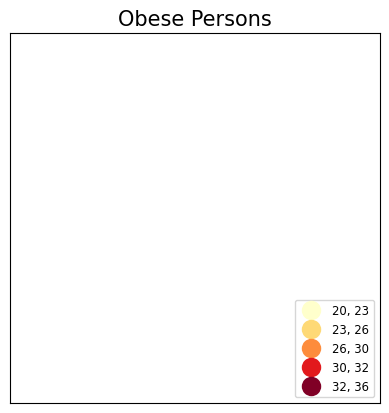

In [ ]:
# Create the plot
ax = njC2.plot(column='Obese Persons', cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=2, legend=True,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
# Set title
ax.set_title("Obese Persons", fontsize=15)

# Remove x and y ticks if you want to clean up the plot further
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

# Making the map

<Axes: >

[]

[]

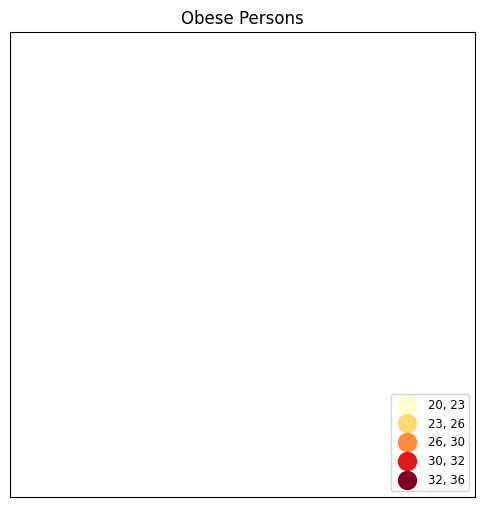

In [ ]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='Obese Persons',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Obese Persons")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
njC2.dtypes

Use these maps

<Axes: >

[]

[]

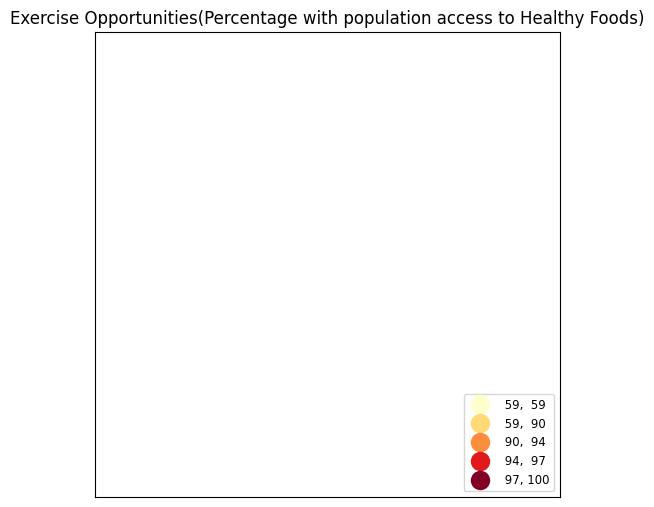

In [ ]:

#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='Exercise Opportunities',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Exercise Opportunities(Percentage with population access to Healthy Foods)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
print(njC2['Exercise Opportunities'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Exercise Opportunities, dtype: float64


In [ ]:
print(njC2['Exercise Opportunities'])

In [ ]:
njC2 = njC2.dropna(subset=['Exercise Opportunities'])
njC2['Exercise Opportunities'] = njC2['Exercise Opportunities'].astype(int)

In [ ]:
print(njC2['Exercise Opportunities'])

21     93
22    100
23     93
24     94
25     90
26     87
27    100
28     88
29    100
30     92
31     99
32     97
33     96
34     98
35     90
36     99
37     59
38     96
39     93
40    100
41     89
Name: Exercise Opportunities, dtype: int64


In [ ]:
njC2['Exercise Opportunities'] = njC2['Exercise Opportunities'].round(0).astype(int)


In [ ]:
import numpy as np
njC2['Exercise Opportunities'] = np.floor(njC2['Exercise Opportunities']).astype(int)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

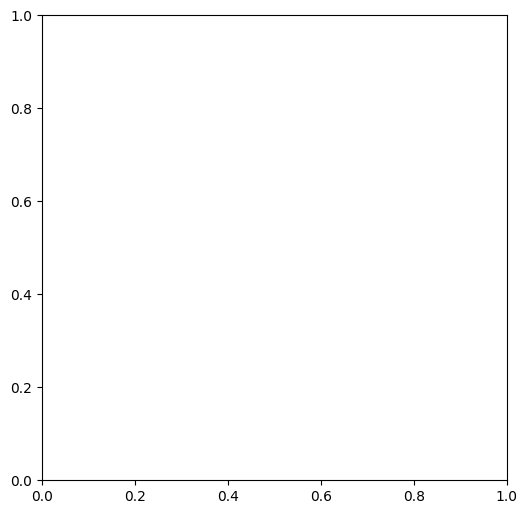

In [ ]:

#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='Exercise Opportunities',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Exercise Opportunities(Percentage with population access to Healthy Foods)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
njC2.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 0.
  self._classify()
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

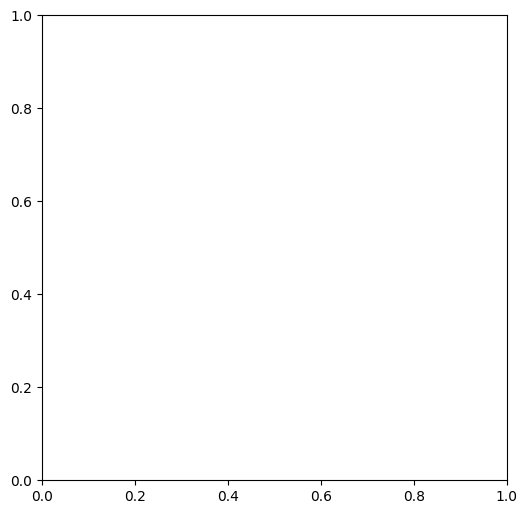

In [ ]:

#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as